In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns

In [2]:
#load data 
data_frame = pd.read_csv("https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/Vaccine.csv")

In [3]:
# know no. of data available in data frame
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [4]:
# collect the column head
data_frame.columns.values

array(['unique_id', 'h1n1_worry', 'h1n1_awareness',
       'antiviral_medication', 'contact_avoidance', 'bought_face_mask',
       'wash_hands_frequently', 'avoid_large_gatherings',
       'reduced_outside_home_cont', 'avoid_touch_face',
       'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket',
       'qualification', 'race', 'sex', 'income_level', 'marital_status',
       'housing_status', 'employment', 'census_msa', 'no_of_adults',
       'no_of_children', 'h1n1_vaccine'], dtype=object)

In [5]:
#Finding missing value in data frame

data_frame.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [6]:
# fill missing values based in median


# Load your dataset into a DataFrame
# Assuming 'data_frame' is your DataFrame
# Replace 'your_dataset.csv' with the path to your dataset file if loading from a file
# df = pd.read_csv('your_dataset.csv')

# Define a list of columns where you want to fill missing values with the mode for categorical columns
categorical_columns_to_fill = ['age_bracket', 'qualification', 'race', 'sex', 'income_level', 
                               'marital_status', 'housing_status', 'employment', 'census_msa']

# Define a list of columns where you want to fill missing values with the median for numerical columns
numerical_columns_to_fill = ['h1n1_worry', 'h1n1_awareness', 'antiviral_medication', 'contact_avoidance',
                             'bought_face_mask', 'wash_hands_frequently', 'avoid_large_gatherings',
                             'reduced_outside_home_cont', 'avoid_touch_face', 'dr_recc_h1n1_vacc',
                             'dr_recc_seasonal_vacc', 'chronic_medic_condition', 'cont_child_undr_6_mnths',
                             'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
                             'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
                             'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults', 'no_of_children']

# Iterate over each categorical column
for col in categorical_columns_to_fill:
    # Find the mode (most frequent value) of the column
    mode_value = data_frame[col].mode()[0]
    # Fill missing values in the column with the mode
    data_frame[col].fillna(mode_value, inplace=True)

# Iterate over each numerical column
for col in numerical_columns_to_fill:
    # Calculate the median value of the column
    median_value = data_frame[col].median()
    # Fill missing values in the column with the median
    data_frame[col].fillna(median_value, inplace=True)



In [7]:
#Once again chech the missing value in data

#Finding missing value in data frame

data_frame.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

In [8]:
#chech heat map co-relation

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'red_wine_data_set' is your DataFrame containing numerical columns
numeric_data_frame = data_frame.select_dtypes(include=[np.number])

# Compute correlation matrix
correlation_matrix = numeric_data_frame.corr()

# Plot heatmap with custom colormap
plt.figure(figsize=(100, 100))
sns.heatmap(correlation_matrix, cmap='RdYlBu', annot=True, center=0)
plt.title('Correlation Heatmap')
plt.show()


In [9]:
## To see how many different values inside 1 columns

quality_counts = data_frame['dr_recc_seasonal_vacc'].value_counts().reset_index()
quality_counts.columns = ['dr_recc_seasonal_vacc', 'Count']
# Creating a pie chart
fig = px.pie(quality_counts, values='Count', names='dr_recc_seasonal_vacc', title='No. of different score values available in dr_recc_seasonal_vacc column')
fig.show()

In [10]:
## To see how many different values inside 1 columns

quality_counts = data_frame['dr_recc_h1n1_vacc'].value_counts().reset_index()
quality_counts.columns = ['dr_recc_h1n1_vacc', 'Count']
# Creating a pie chart
fig = px.pie(quality_counts, values='Count', names='dr_recc_h1n1_vacc', title='No. of different score values available in dr_recc_h1n1_vacc column')
fig.show()

In [11]:
## To see how many different values inside 1 columns

quality_counts = data_frame['h1n1_worry'].value_counts().reset_index()
quality_counts.columns = ['h1n1_worry', 'Count']
# Creating a pie chart
fig = px.pie(quality_counts, values='Count', names='h1n1_worry', title='No. of different score values available in h1n1_worry column')
fig.show()

In [436]:
## To see how many different values inside 1 columns

quality_counts = data_frame['age_bracket'].value_counts().reset_index()
quality_counts.columns = ['age_bracket', 'Count']
# Creating a pie chart
fig = px.pie(quality_counts, values='Count', names='age_bracket', title='No. of different score values available in age_bracket column')
fig.show()

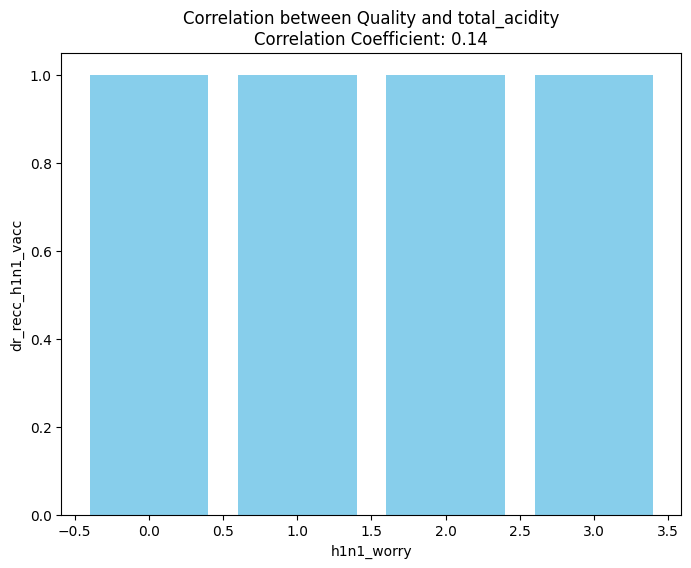

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Load the dataset
data = data_frame
# Calculate correlation
correlation = data['h1n1_worry'].corr(data['dr_recc_h1n1_vacc'])

# Plot bar chart using Matplotlib
plt.figure(figsize=(8, 6))
plt.bar(data['h1n1_worry'], data['dr_recc_h1n1_vacc'], color='skyblue')
plt.xlabel('h1n1_worry')
plt.ylabel('dr_recc_h1n1_vacc')
plt.title(f'Correlation between Quality and total_acidity\nCorrelation Coefficient: {correlation:.2f}')
plt.show()


In [14]:
### EDA 1 - if the number is 0 then it's 0 or the number is bigger than 0 then all are equal to 1

import pandas as pd

# Assuming your DataFrame is named df
# Creating a new column based on the condition you mentioned
data_frame['h1n1_worry_0_1'] = data_frame['h1n1_worry'].apply(lambda x: 0 if x == 0 else 1)

# Displaying the DataFrame
data_frame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26707 non-null  float64
 2   h1n1_awareness             26707 non-null  float64
 3   antiviral_medication       26707 non-null  float64
 4   contact_avoidance          26707 non-null  float64
 5   bought_face_mask           26707 non-null  float64
 6   wash_hands_frequently      26707 non-null  float64
 7   avoid_large_gatherings     26707 non-null  float64
 8   reduced_outside_home_cont  26707 non-null  float64
 9   avoid_touch_face           26707 non-null  float64
 10  dr_recc_h1n1_vacc          26707 non-null  float64
 11  dr_recc_seasonal_vacc      26707 non-null  float64
 12  chronic_medic_condition    26707 non-null  float64
 13  cont_child_undr_6_mnths    26707 non-null  flo

In [415]:
### EDA 2 summ two column value into 1

import pandas as pd

# Summing the columns
data_frame['sum_column'] = data_frame['h1n1_worry'] + data_frame['is_h1n1_vacc_effective'] + data_frame['no_of_adults']

# Displaying the updated DataFrame
print(data_frame.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26707 non-null  float64
 2   h1n1_awareness             26707 non-null  float64
 3   antiviral_medication       26707 non-null  float64
 4   contact_avoidance          26707 non-null  float64
 5   bought_face_mask           26707 non-null  float64
 6   wash_hands_frequently      26707 non-null  float64
 7   avoid_large_gatherings     26707 non-null  float64
 8   reduced_outside_home_cont  26707 non-null  float64
 9   avoid_touch_face           26707 non-null  float64
 10  dr_recc_h1n1_vacc          26707 non-null  float64
 11  dr_recc_seasonal_vacc      26707 non-null  float64
 12  chronic_medic_condition    26707 non-null  float64
 13  cont_child_undr_6_mnths    26707 non-null  flo

In [438]:
import pandas as pd

# Function to map age brackets to numerical values
def map_age_to_numeric(age_bracket):
    if '18 - 34' in age_bracket:
        return 1
    elif '35 - 44' in age_bracket:
        return 2
    elif '45 - 54' in age_bracket:
        return 3
    elif '55 - 64' in age_bracket:
        return 4
    elif '65+' in age_bracket:  # Modified condition to cover all cases of 65+
        return 5
    else:
        return None  # Handle other cases if needed

# Apply the function to create a new column
data_frame['Mapped Age'] = data_frame['age_bracket'].apply(map_age_to_numeric)

print(data_frame.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26707 non-null  float64
 2   h1n1_awareness             26707 non-null  float64
 3   antiviral_medication       26707 non-null  float64
 4   contact_avoidance          26707 non-null  float64
 5   bought_face_mask           26707 non-null  float64
 6   wash_hands_frequently      26707 non-null  float64
 7   avoid_large_gatherings     26707 non-null  float64
 8   reduced_outside_home_cont  26707 non-null  float64
 9   avoid_touch_face           26707 non-null  float64
 10  dr_recc_h1n1_vacc          26707 non-null  float64
 11  dr_recc_seasonal_vacc      26707 non-null  float64
 12  chronic_medic_condition    26707 non-null  float64
 13  cont_child_undr_6_mnths    26707 non-null  flo

In [115]:
###spliting x data

data = data_frame
 
x=data[["dr_recc_h1n1_vacc"]].values     # if you want to add more columns to add following example ie: x=city[["h1n1_worry","is_health_worker","Wind Speed"]].values
x.shape   #dr_recc_h1n1_vacc

(26707, 1)

In [116]:
### spliting y data

y=data["h1n1_vaccine"].values #dr_recc_seasonal_vacc   
y.shape

(26707,)

In [117]:
### spliting x test and y test

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [118]:
### 1 - first model apply

from sklearn.linear_model import LinearRegression

model=LinearRegression().fit(X_train,y_train)
model

LinearRegression()

In [119]:
### knowing prddection value
    
y_pred=model.predict(X_test)
y_pred

array([0.13094918, 0.13094918, 0.13094918, ..., 0.13094918, 0.13094918,
       0.13094918])

In [120]:
### finding error values

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.2817806347718244
Mean Squared Error: 0.1411595454980011
Root Mean Squared Error: 0.3757120513079147


In [121]:
### model accurecy

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R² score:', r2)

R² score: 0.15328203286962516


In [122]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error

# Creating and training the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test) 

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculating mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Accuracy: 0.801572444777237
Mean Squared Error: 0.198427555222763


In [123]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

# Create the decision tree classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Accuracy: 0.801572444777237
Mean Squared Error: 0.198427555222763


In [124]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Accuracy: 0.801572444777237
Mean Squared Error: 0.198427555222763


In [125]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# Initialize the Naive Bayes classifier
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)

# Calculate error
error = 1 - accuracy

print("Accuracy:", accuracy)
print("Error:", error)


Accuracy: 0.801572444777237
Error: 0.198427555222763


In [126]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

# Initialize and fit the Gradient Boosting Classifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Accuracy: 0.801572444777237
Mean Squared Error: 0.198427555222763


In [127]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_squared_error

# Initialize SVM classifier
svm_clf = SVC(kernel='linear')

# Train the classifier
svm_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate mean squared error
mean_squared_error_value = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mean_squared_error_value)


Accuracy: 0.801572444777237
Mean Squared Error: 0.198427555222763


In [114]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Initialize the Lasso Regression model
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha value as needed

# Train the model
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r_squared)


Mean Squared Error: 0.15908780617354615
R-squared: -0.0002121644826225122


In [53]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the ElasticNet regression model
model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # You can adjust alpha and l1_ratio parameters
model.fit(X_train, y_train)
print(model)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


ElasticNet(alpha=0.1)
Mean Squared Error: 0.15908780617354615
R^2 Score: -0.0002121644826225122


In [54]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Create SVR model
svr_model = SVR(kernel='rbf')  # You can specify different kernels like 'linear', 'poly', 'sigmoid', etc.

# Train the model
svr_model.fit(X_train, y_train)

# Make predictions
y_pred = svr_model.predict(X_test)

# Calculate accuracy metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 0.1687420441771521
R^2 Score: -0.06091000501656785


In [55]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming X_train, X_test, y_train, y_test are your training and testing data
model = DecisionTreeRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the coefficient of determination (R-squared)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.157784512424374
R-squared: 0.00798186555129532


In [488]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming X_train, X_test, y_train, y_test are already defined

# Create a Random Forest Regression model
model = RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 0.1368210423844702
R^2 Score: 0.35863306921087934


In [ ]:
### 2 - second model

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Assuming you have your data prepared and split into X_train, X_test, y_train, y_test

# Instantiate the Ridge Regression model with a regularization parameter alpha
ridge_model = Ridge(alpha=1.0)  # You can adjust alpha as needed

# Train the model
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

In [120]:
#### scaling or normalizing or standard

df_scaled = data.copy()
col_names = ['h1n1_worry', 'dr_recc_h1n1_vacc']
features = df_scaled[col_names]

In [121]:
from sklearn.preprocessing import MinMaxScaler
#x_scaled = (x – x_min)/(x_max – x_min)
scaler = MinMaxScaler()
df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled


,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine,h1n1_worry_0_1
0,0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0,1
1,1,1.000000,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0,1
2,2,0.333333,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0,1
3,3,0.333333,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0,1
4,4,0.666667,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,0.666667,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0,1
26703,26703,0.333333,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0,1
26704,26704,0.666667,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",0.0,0.0,0,1
26705,26705,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0,1


In [122]:
x2=df_scaled[["h1n1_worry"]].values     # if you want to add more columns to add following example ie: x=city[["h1n1_worry","is_health_worker","Wind Speed"]].values
x2.shape

(26707, 1)

In [123]:
### spliting y data

y2=data["dr_recc_h1n1_vacc"].values
y2.shape


(26707,)

In [124]:
### spliting x test and y test

from sklearn.model_selection import train_test_split


X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=10)

In [125]:
### 1 - first model apply

from sklearn.linear_model import LinearRegression

model=LinearRegression().fit(X2_train,y2_train)
model

LinearRegression()

In [126]:
### finding error values

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_test, y_pred)))

Mean Absolute Error: 0.31701541609381817
Mean Squared Error: 0.1594701170208818
Root Mean Squared Error: 0.3993370969755775


In [127]:
### model accurecy

from sklearn.metrics import r2_score
r2 = r2_score(y2_test, y_pred)
print('R² score:', r2)

R² score: 0.0194369772676809
